<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/Group_Assignment_4_EDA_Preprocess_Eric_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413: Group Assignment 4

## PART I

### 1. Preliminary Data Cleaning

In [2]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
# Reading in the Dataset
train = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Training.csv'
test = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Test.csv'

data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5371 non-null   int64  
 1   Total Households                                                           5297 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5297 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5297 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5297 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [13]:
data_train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


**Insights from the Dataset**


*   Missing Values in many of the columns (5371 in total but most had 5297)
*   Naming of the column (Total Households For Period Of Construction Built Between 1981 And 190)?





In [16]:
# Renaming the Misnamed Column
data_train.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)
data_test.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)

# Simplify Some Col Names
data_train.rename(columns= {"Total Population": "Population"}, inplace = True)
data_test.rename(columns= {"Total Population": "Population"}, inplace = True)
data_train.rename(columns= {"Total Households": "Households"}, inplace = True)
data_test.rename(columns= {"Total Households": "Households"}, inplace = True)
data_train.rename(columns= {"Median Household Income (Current Year $)": "Income"}, inplace = True)
data_test.rename(columns= {"Median Household Income (Current Year $)": "Income"}, inplace = True)

data_train.rename(columns= {"Total Households For Structure Type Houses": "House"}, inplace = True)
data_test.rename(columns= {"Total Households For Structure Type Houses": "House"}, inplace = True)
data_train.rename(columns= {"Total Households For Structure Type Apartment, Building Low_High Rise": "Apartment"}, inplace = True)
data_test.rename(columns=  {"Total Households For Structure Type Apartment, Building Low_High Rise": "Apartment"}, inplace = True)
data_train.rename(columns= {"Total Households For Structure Type Other Dwelling Types": "Other_dwelling"}, inplace = True)
data_test.rename(columns=  {"Total Households For Structure Type Other Dwelling Types": "Other_dwelling"}, inplace = True)

data_train.rename(columns = {"Dwellings by Tenure Owner": "Owner"}, inplace = True)
data_test.rename(columns = {"Dwellings by Tenure Owner": "Owner"}, inplace = True)
data_train.rename(columns = {"Dwellings by Tenure Renter": "Renter"}, inplace = True)
data_test.rename(columns =  {"Dwellings by Tenure Renter": "Renter"}, inplace = True)


data_train.rename(columns = {"Total Households For Period Of Construction": "Total_Construction"}, inplace = True)
data_test.rename(columns = {"Total Households For Period Of Construction": "Total_Construction"}, inplace = True)
data_train.rename(columns = {"Total Households for Tenure": "Total_Tenure"}, inplace = True)
data_test.rename(columns =   {"Total Households for Tenure": "Total_Tenure"}, inplace = True)

# Renaming columns that match a specific pattern using regex
data_train = data_train.rename(columns= lambda x: x.replace('Total Households For Period Of Construction Built ', '') if x.startswith('Total Households For Period Of Construction Built ') else x)
data_train = data_train.rename(columns= lambda x: x.replace('Between ', '') if x.startswith('Between ') else x)
data_train = data_train.rename(columns= lambda x: x.replace(' And ', '_'))
data_test = data_test.rename(columns= lambda x: x.replace('Total Households For Period Of Construction Built ', '') if x.startswith('Total Households For Period Of Construction Built ') else x)
data_test = data_test.rename(columns= lambda x: x.replace('Between ', '') if x.startswith('Between ') else x)
data_test = data_test.rename(columns= lambda x: x.replace(' And ', '_'))
data_train.rename(columns= {"Before 1961": "_1961"}, inplace = True)
data_test.rename(columns=  {"Before 1961": "_1961"}, inplace = True)

# Show
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          5371 non-null   int64  
 1   Households          5297 non-null   float64
 2   Income              5245 non-null   float64
 3   Total_Construction  5297 non-null   float64
 4   _1961               5297 non-null   float64
 5   1961_1980           5297 non-null   float64
 6   1981_1990           5297 non-null   float64
 7   1991_2000           5297 non-null   float64
 8   2001_2005           5297 non-null   float64
 9   2006_2010           5297 non-null   float64
 10  2011_2015           5297 non-null   float64
 11  2016_2021           5297 non-null   float64
 12  House               5371 non-null   int64  
 13  Apartment           5371 non-null   int64  
 14  Other_dwelling      5371 non-null   int64  
 15  Total_Tenure        5297 non-null   float64
 16  Owner 

**Now we start to drop the columns.**

We will remove observations that:


1.   has missing data in 'Population','Households','Income'.
2.   has less than 80% values in any row.

After these two filters, the non-null counts are the same for all features.



In [17]:
# Dropping rows with empty values in: 'Total Population','Households','Median Household Income (Current Year $)'
data_train.dropna(axis=0, how = 'any', subset=['Population','Households','Income'], inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          5245 non-null   int64  
 1   Households          5245 non-null   float64
 2   Income              5245 non-null   float64
 3   Total_Construction  5245 non-null   float64
 4   _1961               5245 non-null   float64
 5   1961_1980           5245 non-null   float64
 6   1981_1990           5245 non-null   float64
 7   1991_2000           5245 non-null   float64
 8   2001_2005           5245 non-null   float64
 9   2006_2010           5245 non-null   float64
 10  2011_2015           5245 non-null   float64
 11  2016_2021           5245 non-null   float64
 12  House               5245 non-null   int64  
 13  Apartment           5245 non-null   int64  
 14  Other_dwelling      5245 non-null   int64  
 15  Total_Tenure        5245 non-null   float64
 16  Owner 

In [18]:
# Dropping rows with mostly empty values (threshold set to 80%)
threshold = 0.8
data_train.dropna(thresh=threshold*len(data_train.columns), inplace = True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          5245 non-null   int64  
 1   Households          5245 non-null   float64
 2   Income              5245 non-null   float64
 3   Total_Construction  5245 non-null   float64
 4   _1961               5245 non-null   float64
 5   1961_1980           5245 non-null   float64
 6   1981_1990           5245 non-null   float64
 7   1991_2000           5245 non-null   float64
 8   2001_2005           5245 non-null   float64
 9   2006_2010           5245 non-null   float64
 10  2011_2015           5245 non-null   float64
 11  2016_2021           5245 non-null   float64
 12  House               5245 non-null   int64  
 13  Apartment           5245 non-null   int64  
 14  Other_dwelling      5245 non-null   int64  
 15  Total_Tenure        5245 non-null   float64
 16  Owner 

In [20]:
data_train.head(10)

,Population,Households,Income,Total_Construction,_1961,1961_1980,1981_1990,1991_2000,2001_2005,2006_2010,2011_2015,2016_2021,House,Apartment,Other_dwelling,Total_Tenure,Owner,Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0
5,3112,1145.0,100000.0,1145.0,0.0,760.0,300.0,55.0,0.0,10.0,0.0,15.0,1135,0,10,1145.0,960.0,185.0
6,4948,1830.0,83000.0,1830.0,1185.0,225.0,50.0,115.0,135.0,30.0,55.0,30.0,255,1595,0,1830.0,1030.0,805.0
7,4780,1880.0,96000.0,1880.0,535.0,570.0,200.0,340.0,60.0,45.0,45.0,85.0,1715,140,25,1880.0,1660.0,220.0
8,4088,1280.0,119000.0,1280.0,85.0,150.0,150.0,635.0,210.0,20.0,10.0,10.0,1065,210,5,1280.0,1070.0,205.0
9,3147,1205.0,49600.0,1205.0,630.0,295.0,50.0,175.0,15.0,0.0,0.0,25.0,385,820,0,1205.0,340.0,860.0


### 2. EDA

<Axes: >

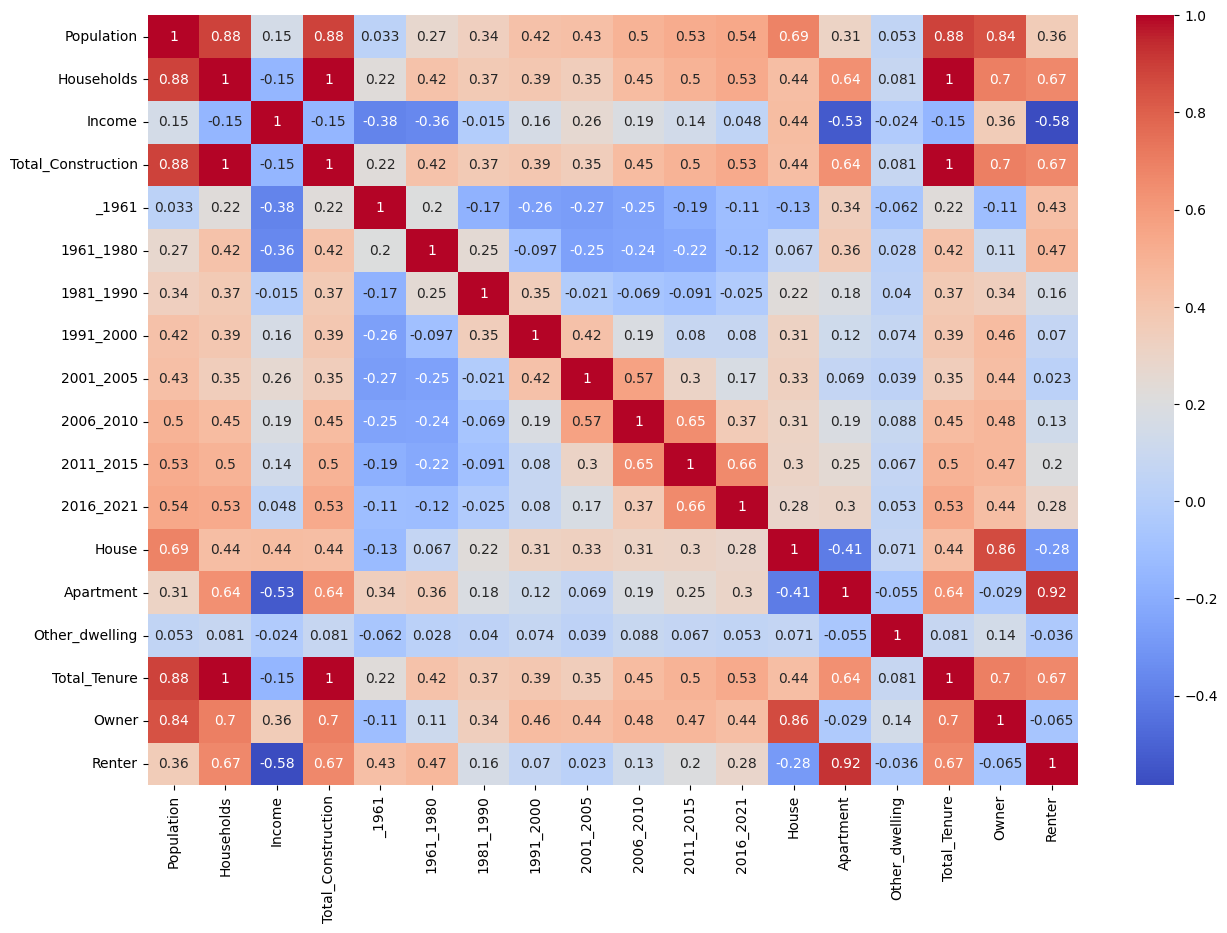

In [21]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (15,10))
sns.heatmap(data_train.corr(),annot=True, cmap = 'coolwarm')

From the EDA report generated above, we observe the following:


1.   Variables **Total Households**, **Total Households for Period Construction**, and **Total Households for Tenure** are perfectly correlated with each other.
2.   **Total Households** and **Total Population** is highly correlated (i.e. 0.88).
3.   **Dwellings by Tenure Owner** and **Total Households For Structure Type Houses** are hightly correlated (corr = 0.86), similarly we find that **Dwellings by Tenure Renter** and **Total Households For Structure Type Apartment, Building Low And High Rise** are hightly correlated too (corr = 0.92).
4.   The percentage of **Total Households For Structure Type Other Dwelling Types** of total households are very small in many Census Tracts.
5.   Variables of the type **Total Households For Structure Type...** generally exhibited a higher association with the response variable (so perhaps we should only include one set of these two variables)
6.   Variables **Total Households**, **Total Population**, **Total Households for Period Construction**, and **Total Households for Tenure** showed no (or very trivial) association with the response variable.

Steps of Data Preprocessing:
1.   We can remove **Total Households for Period Construction** and **Total Households for Tenure** as **Total Households** includes both.
2.   We can remove **Total Population** as it is (1). highly correlated with **Total Households**.
3.   We can remove the variables of the type **Dwellings by...** as they are highly correlated with the variables of the type **Total Households For Structure Type...** as mentioned above.
4.   **Total Households For Structure Type Other Dwelling Types** also had no association with the response variable. So we can derive a new column called **% of Total Households For Structure Type Houses**
5.  Similarly we derive percentage columns for **Total Households For Period Of Construction...** in order to provide better insights for our analysis.







### Data Preprocessing Based on EDA

In [24]:
# remove Total Households for Period Construction, Total Households for Tenure and Total Population
train_cleaned = data_train.drop(columns = ['Total_Construction','Total_Tenure','Population','Owner','Renter'])

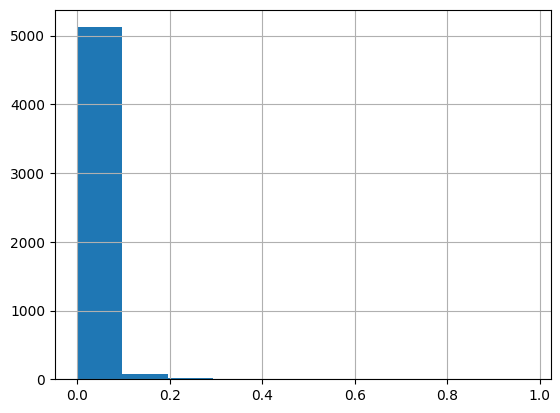

In [26]:
train_cleaned['pct_str_other'] = train_cleaned['Other_dwelling'] / train_cleaned['Households']
train_cleaned['pct_str_other'].hist()
train_cleaned.drop(columns= ['pct_str_other'], inplace = True) # delete after analysis

In [27]:
# Adding derived columns - percentages
train_cleaned["pct_1961_before"] = train_cleaned['_1961'] / train_cleaned['Households']
train_cleaned["pct_1961_1980"] = train_cleaned['1961_1980'] / train_cleaned['Households']
train_cleaned["pct_1981_1990"] = train_cleaned['1981_1990'] / train_cleaned['Households']
train_cleaned["pct_1991_2000"] = train_cleaned['1991_2000'] / train_cleaned['Households']
train_cleaned["pct_2001_2005"] = train_cleaned['2001_2005'] / train_cleaned['Households']
train_cleaned["pct_2006_2010"] = train_cleaned['2006_2010'] / train_cleaned['Households']
train_cleaned["pct_2011_2015"] = train_cleaned['2011_2015'] / train_cleaned['Households']
train_cleaned["pct_2016_2021"] = train_cleaned['2016_2021'] / train_cleaned['Households']
train_cleaned["pct_house"] = train_cleaned['House'] / train_cleaned['Households']

# Dropping originals
train_cleaned.drop(columns= ['House', 'Apartment', 'Other_dwelling',
                             '_1961','1961_1980', '1981_1990', '1991_2000', '2001_2005', '2006_2010','2011_2015', '2016_2021'], inplace = True)



In [28]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Households       5245 non-null   float64
 1   Income           5245 non-null   float64
 2   pct_1961_before  5245 non-null   float64
 3   pct_1961_1980    5245 non-null   float64
 4   pct_1981_1990    5245 non-null   float64
 5   pct_1991_2000    5245 non-null   float64
 6   pct_2001_2005    5245 non-null   float64
 7   pct_2006_2010    5245 non-null   float64
 8   pct_2011_2015    5245 non-null   float64
 9   pct_2016_2021    5245 non-null   float64
 10  pct_house        5245 non-null   float64
dtypes: float64(11)
memory usage: 491.7 KB


In [29]:
train_cleaned.head(10)

,Households,Income,pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house
0,1235.0,107000.0,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028
1,1665.0,111000.0,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964
2,2775.0,105000.0,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856
3,1775.0,65000.0,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676
4,1385.0,101000.0,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292
5,1145.0,100000.0,0.000000,0.663755,0.262009,0.048035,0.000000,0.008734,0.000000,0.013100,0.991266
6,1830.0,83000.0,0.647541,0.122951,0.027322,0.062842,0.073770,0.016393,0.030055,0.016393,0.139344
7,1880.0,96000.0,0.284574,0.303191,0.106383,0.180851,0.031915,0.023936,0.023936,0.045213,0.912234
8,1280.0,119000.0,0.066406,0.117188,0.117188,0.496094,0.164062,0.015625,0.007812,0.007812,0.832031
9,1205.0,49600.0,0.522822,0.244813,0.041494,0.145228,0.012448,0.000000,0.000000,0.020747,0.319502


### Data Visualization


<Axes: title={'center': 'Distribution of Income - Original'}>

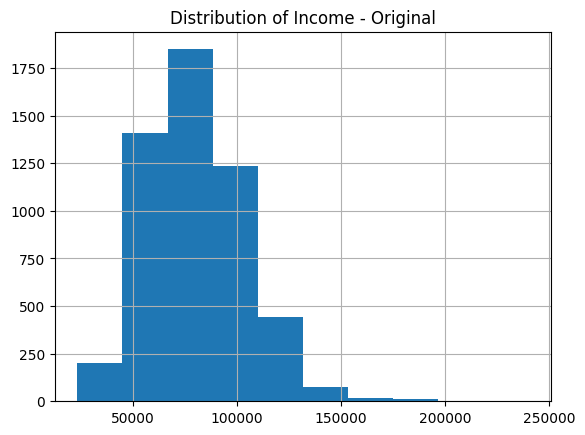

In [62]:
plt.title('Distribution of Income - Original')
train_cleaned['Income'].hist()

<Axes: >

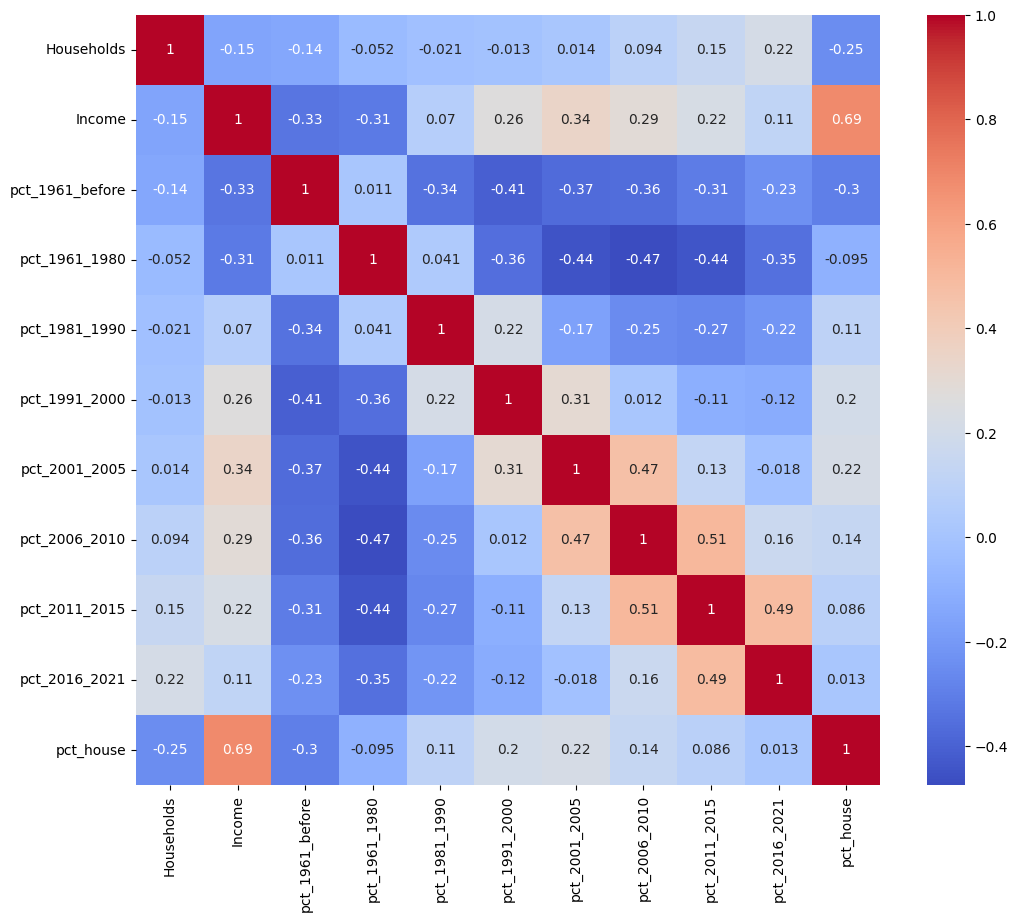

In [30]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (12,10))
sns.heatmap(train_cleaned.corr(),annot=True, cmap = 'coolwarm')

[Text(0, 0, 'Households'),
 Text(0, 1, 'Income'),
 Text(0, 2, 'pct_1961_before'),
 Text(0, 3, 'pct_1961_1980'),
 Text(0, 4, 'pct_1981_1990'),
 Text(0, 5, 'pct_1991_2000'),
 Text(0, 6, 'pct_2001_2005'),
 Text(0, 7, 'pct_2006_2010'),
 Text(0, 8, 'pct_2011_2015'),
 Text(0, 9, 'pct_2016_2021'),
 Text(0, 10, 'pct_house')]

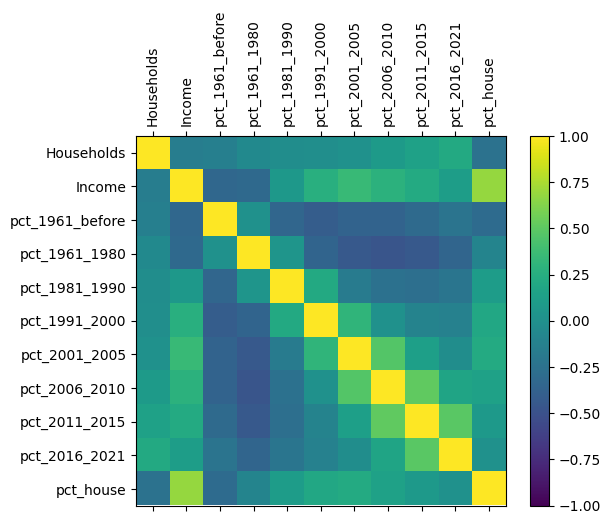

In [ ]:
# Constructing a Correlation Matrix for the selected data
correlations = train_cleaned.corr(numeric_only = True)
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)


# change the tick labels
ticks = range(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = train_cleaned.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

In [31]:
train_cleaned.head(10)

,Households,Income,pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house
0,1235.0,107000.0,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028
1,1665.0,111000.0,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964
2,2775.0,105000.0,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856
3,1775.0,65000.0,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676
4,1385.0,101000.0,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292
5,1145.0,100000.0,0.000000,0.663755,0.262009,0.048035,0.000000,0.008734,0.000000,0.013100,0.991266
6,1830.0,83000.0,0.647541,0.122951,0.027322,0.062842,0.073770,0.016393,0.030055,0.016393,0.139344
7,1880.0,96000.0,0.284574,0.303191,0.106383,0.180851,0.031915,0.023936,0.023936,0.045213,0.912234
8,1280.0,119000.0,0.066406,0.117188,0.117188,0.496094,0.164062,0.015625,0.007812,0.007812,0.832031
9,1205.0,49600.0,0.522822,0.244813,0.041494,0.145228,0.012448,0.000000,0.000000,0.020747,0.319502


## NEW BRANCH: Aggregated Dataset

In [32]:
# Aggregation
data_train_agg = data_train.drop(columns = ['Total_Construction','Total_Tenure','Population','Owner','Renter']).groupby('Income').sum().reset_index()

In [35]:
# Sort Values
data_train_agg = data_train_agg.sort_values(by ='Income', ascending=False)
# Check
data_train_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          213 non-null    float64
 1   Households      213 non-null    float64
 2   _1961           213 non-null    float64
 3   1961_1980       213 non-null    float64
 4   1981_1990       213 non-null    float64
 5   1991_2000       213 non-null    float64
 6   2001_2005       213 non-null    float64
 7   2006_2010       213 non-null    float64
 8   2011_2015       213 non-null    float64
 9   2016_2021       213 non-null    float64
 10  House           213 non-null    int64  
 11  Apartment       213 non-null    int64  
 12  Other_dwelling  213 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 23.3 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          213 non-null    float64
 1   Households      213 non-null    float64
 2   _1961           213 non-null    float64
 3   1961_1980       213 non-null    float64
 4   1981_1990       213 non-null    float64
 5   1991_2000       213 non-null    float64
 6   2001_2005       213 non-null    float64
 7   2006_2010       213 non-null    float64
 8   2011_2015       213 non-null    float64
 9   2016_2021       213 non-null    float64
 10  House           213 non-null    int64  
 11  Apartment       213 non-null    int64  
 12  Other_dwelling  213 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 23.3 KB


In [36]:
# Copy
data_train_agg_pct = data_train_agg.copy()
# Adding derived columns - percentages
data_train_agg_pct["pct_1961_before"] = data_train_agg_pct['_1961'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_1961_1980"] = data_train_agg_pct['1961_1980'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_1981_1990"] = data_train_agg_pct['1981_1990'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_1991_2000"] = data_train_agg_pct['1991_2000'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2001_2005"] = data_train_agg_pct['2001_2005'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2006_2010"] = data_train_agg_pct['2006_2010'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2011_2015"] = data_train_agg_pct['2011_2015'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2016_2021"] = data_train_agg_pct['2016_2021'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_house"] = data_train_agg_pct['House'] / data_train_agg_pct['Households']

# Dropping originals
data_train_agg_pct.drop(columns=['House', 'Apartment', 'Other_dwelling', '_1961','1961_1980', '1981_1990', '1991_2000', '2001_2005', '2006_2010','2011_2015', '2016_2021'], inplace = True)

In [37]:
data_train_agg_pct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           213 non-null    float64
 1   Households       213 non-null    float64
 2   pct_1961_before  213 non-null    float64
 3   pct_1961_1980    213 non-null    float64
 4   pct_1981_1990    213 non-null    float64
 5   pct_1991_2000    213 non-null    float64
 6   pct_2001_2005    213 non-null    float64
 7   pct_2006_2010    213 non-null    float64
 8   pct_2011_2015    213 non-null    float64
 9   pct_2016_2021    213 non-null    float64
 10  pct_house        213 non-null    float64
dtypes: float64(11)
memory usage: 20.0 KB


In [38]:
data_train_agg_pct.head(20)

,Income,Households,pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house
212,240000.0,665.0,0.827068,0.090226,0.037594,0.022556,0.000000,0.000000,0.015038,0.000000,0.969925
211,208000.0,990.0,0.909091,0.065657,0.010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.944444
210,206000.0,870.0,0.833333,0.068966,0.022989,0.034483,0.011494,0.017241,0.011494,0.000000,0.827586
209,194000.0,1945.0,0.820051,0.056555,0.007712,0.020566,0.012853,0.035990,0.028278,0.015424,0.796915
208,190000.0,1310.0,0.587786,0.171756,0.099237,0.038168,0.019084,0.015267,0.007634,0.045802,0.881679
207,188000.0,110.0,0.000000,0.181818,0.181818,0.363636,0.090909,0.000000,0.000000,0.227273,0.909091
206,184000.0,1060.0,0.283019,0.099057,0.117925,0.127358,0.122642,0.113208,0.084906,0.042453,0.948113
205,180000.0,3295.0,0.086495,0.080425,0.150228,0.229135,0.220030,0.113809,0.040971,0.074355,0.915023
204,178000.0,2185.0,0.702517,0.080092,0.029748,0.036613,0.016018,0.038902,0.036613,0.052632,0.860412
203,176000.0,1010.0,0.000000,0.000000,0.009901,0.000000,0.009901,0.049505,0.722772,0.212871,0.955446


### Visualization - Aggregates

<Axes: >

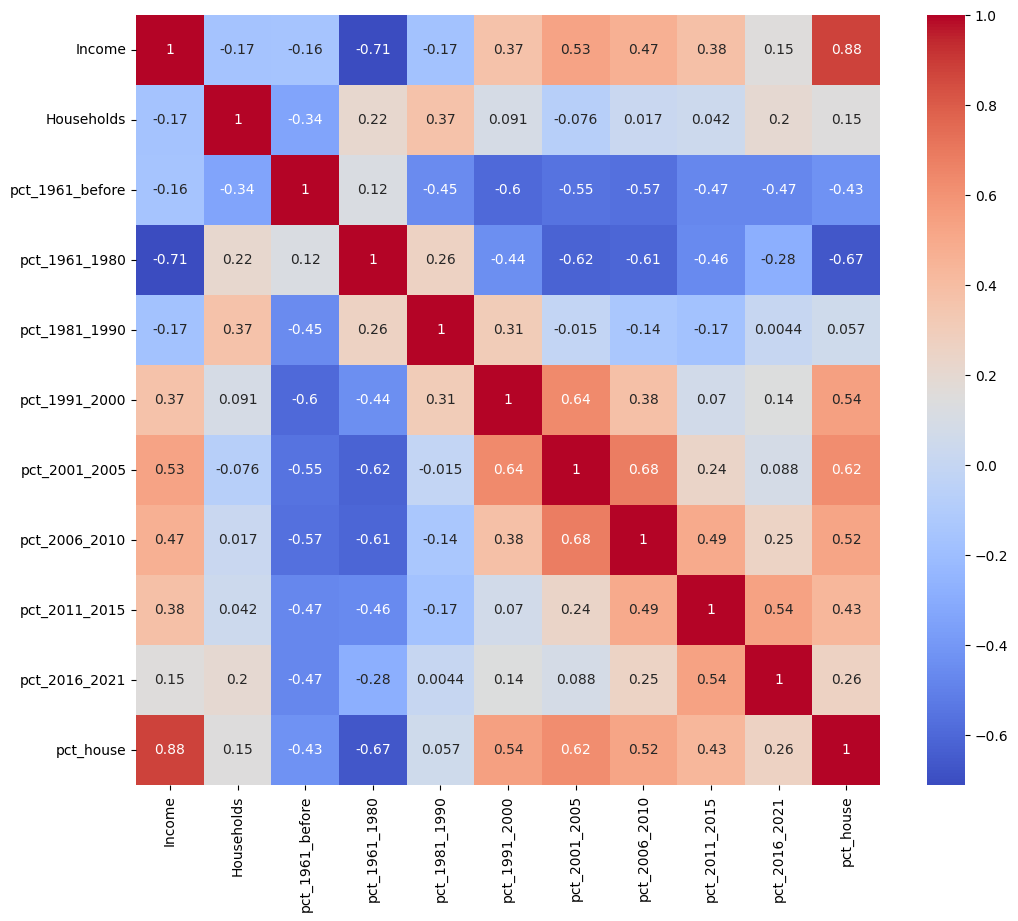

In [39]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (12,10))
sns.heatmap(data_train_agg_pct.corr(),annot=True, cmap = 'coolwarm')

<Axes: title={'center': 'Distribution of Income - Aggregate'}>

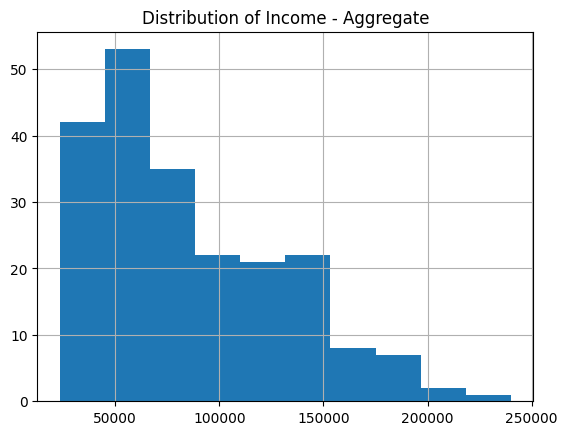

In [63]:
plt.title('Distribution of Income - Aggregate')

data_train_agg_pct['Income'].hist()

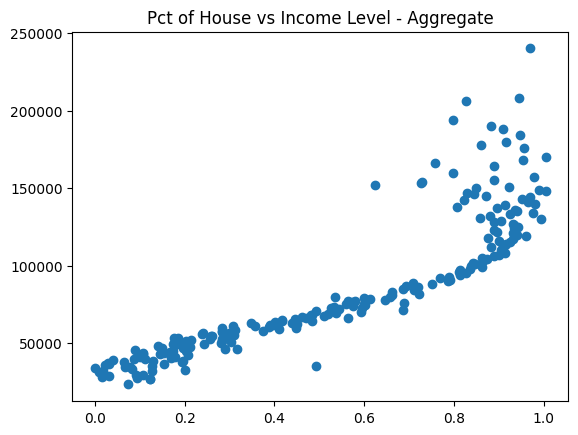

In [65]:
# The higher the house
plt.title('Pct of House vs Income Level - Aggregate')

plt.scatter(data_train_agg_pct['pct_house'], data_train_agg_pct['Income'])

<Axes: >

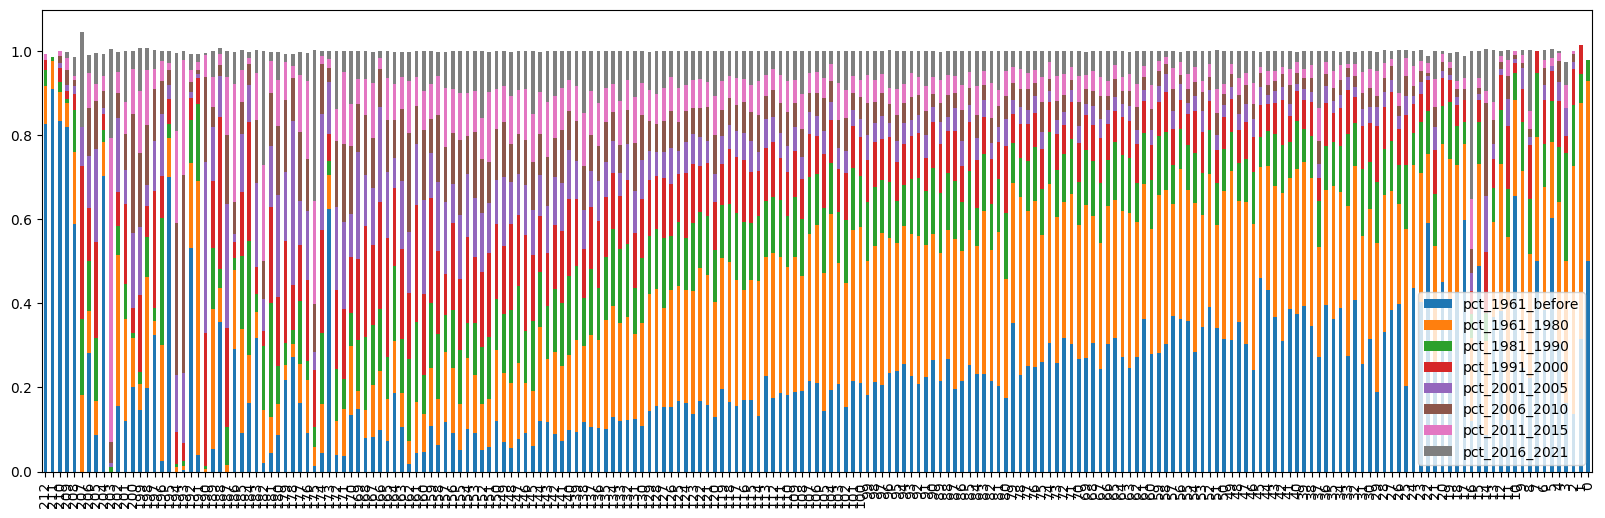

In [ ]:
#
fig, ax = plt.subplots(figsize=(20,6))
# ax.xaxis(data_train_agg_pct['Income'])
data_train_agg_pct.iloc[:, 2:10].plot(kind = 'bar', stacked=True, ax =ax)

## Caution:
We can see from the histogram that the household size of each census tract varies greatly, so every ML needs to take that into account when doing sampling.


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**stratify = 'Household'**


(array([ 488., 1921., 1782.,  746.,  204.,   63.,   23.,    9.,    6.,
           3.]),
 array([  85.,  866., 1647., 2428., 3209., 3990., 4771., 5552., 6333.,
        7114., 7895.]),
 <BarContainer object of 10 artists>)

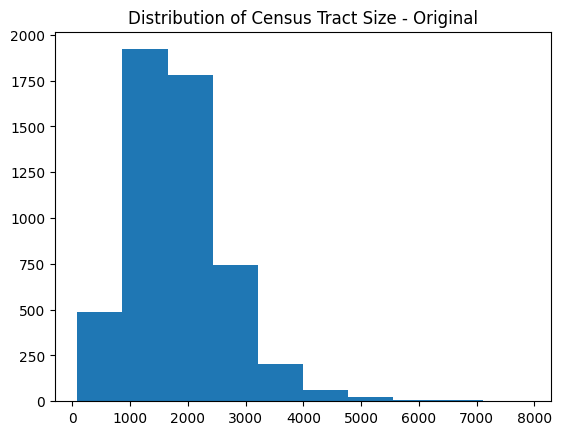

In [60]:

plt.title('Distribution of Census Tract Size - Original')
plt.hist(train_cleaned['Households'])


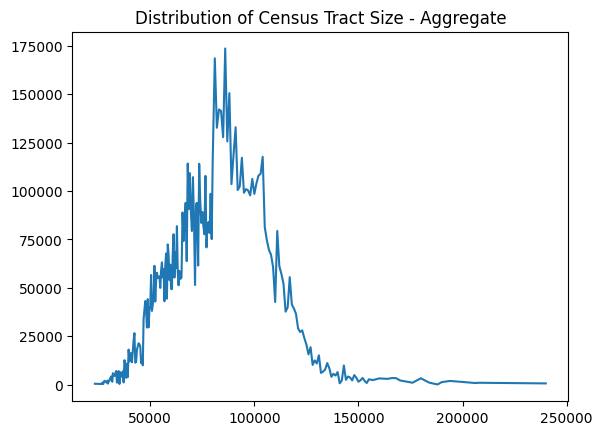

In [61]:
plt.title('Distribution of Census Tract Size - Aggregate')
plt.plot(data_train_agg_pct['Income'], data_train_agg_pct['Households'])
#data_train_agg_pct['Households'].hist()